## **Utilizando NLP para identificação dos sintomas de estresse atráves de um texto**

***

##### **Import das bibliotecas que serão utilizadas no projeto**

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

***

##### **Configurando o display do pandas e carregando o dataset**

In [2]:
#configurando display pandas
pd.set_option('max_colwidth', 1000)

In [115]:
#carrega o dataframe com os jogos mais populares de 1980 a 2023
df_sintomas = pd.read_csv('C:\\TCC_PUC_2022\\Stress.csv')

***

##### **Analisando o dataset**

In [116]:
#describe dos dados do dataset
df_sintomas.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up ""feelings of doom"" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid ""are you psychic"" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my ""doom"" to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours.",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know STEM students, I would greatly appreciate if you can help take or pass along this short survey. As a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 Amazon gcs.",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)","My mom then hit me with the newspaper and it shocked me that she would do this, she knows I don't like play hitting, smacking, striking, hitting or violence of any sort on my person. Do I send out this vibe asking for it from the universe? Then yesterday I decided to take my friend to go help another ""friend"" move to a new place. While we were driving the friend we are moving strikes me on my shoulder. And I address it immediately because this is the 4th time I have told him not to do these things, then my other friend who is driving nearly gets into an collision with another car i think because he was high on marijuana and the friend we are moving in the backseat is like ""you have to understand I was just trying to get your attention"" you know the thing 5 year olds do to get peoples attention by smacking them, this guy is in his 60's.",1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, he is kind, he is sweet, he is a good student, he likes the same things as me, my family likes him, and so on... but i dont feel that passion that rush i felt with my ex, the truth is that when i started going out with my boyfriend i secretly saw my ex a few times to see if i really didnt feel nothing for him, but it was disgusting, i didnt even want him to touch me, i feel bad with myself i didnt want him, but still, i was there. then i kinda realized i felt nothing love related for him and it was ok, HE was HURT when he knew i was dating this boy and he even begged me to stay but of course not. but now the problem is that when im with my boyfriend i dont feel like i love him, like that thing you kinda have to feel with a new love, i just feel ""ok"" with him, and i catch myself thinking about my ex from time to time, remembering all the good things we had and it drives me crazy because i know that if i see him again i wont feel that way,...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]","October is Domestic Violence Awareness Month and I am a domestic violence survivor who is still struggling, even after over four years. Lately I have been feeling very angry. Angry that my abusive ex received no real consequences for his actions. This man abused me in all manners: physically, sexually, emotionally, verbally, financially, etc. I was granted a restraining order against him (and it was renewed a year later) but I was unable to press criminal charges against him because I didn’t have enough evidence to have a case.",1,0.8,1539809005


***

##### **Tratando os dados do dataset**

In [5]:
#Select das colunas que desejo utilizar
df_sintomas = df_sintomas[['text','label',]].dropna()

In [6]:
#rename dos campos para um mais amigavél
df = df_sintomas.rename(columns={"text": "symptoms", "label": "in_stress"})

In [7]:
#describe para conferir se as alterações foram aplicadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   symptoms   2838 non-null   object
 1   in_stress  2838 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.5+ KB


In [8]:
#Criando uma nova coluna descritiva baseada no campo de indicativo de stress que possui valores 0 (sem estress) e 1 (estress detectado)
conditions = [
    (df['in_stress'] == 0),
    (df['in_stress'] == 1)
    ]

names = ['No','Yes']

df['Stress_Diagnosis'] = np.select(conditions, names)

In [9]:
#contagem dos valores para sim e não
df.Stress_Diagnosis.value_counts()

Yes    1488
No     1350
Name: Stress_Diagnosis, dtype: int64

***

##### **Separando o dataset em dois (treino e teste)** 

In [14]:
#Separa o dataframe em dois (treino e teste)
train, test = train_test_split(df, test_size=0.2, random_state=0)

***

##### **Convertendo dados brutos em dados númericos**

Texte possuem valores descritivos e os algoritimos de classificação entendem somente números, por isso precisamos converter o texto analisado para um vetor númerico antes de passa-lo para o algoritimo.

In [16]:
vectorizer = TfidfVectorizer()

#Vetorizando o dataset de treino
text_train_vectorize = vectorizer.fit_transform(train.symptoms)

#Vetorizando o dataset de treino
text_test_vectorize = vectorizer.transform(test.symptoms)

***

##### **Realizando o treino utilizando o algorimtimo Naive Bayes MultinomialNB**

O classificador multinomial Naive Bayes é adequado para classificação com características discretas (por exemplo, contagem de palavras para classificação de texto). A distribuição multinomial normalmente requer contagens de características inteiras.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html" target="_blank">MultinomialNB</a>

In [17]:
#Treinando o modelo utilizando o dataset de treino.
model1 = MultinomialNB()
model1.fit(text_train_vectorize, train.in_stress)

In [18]:
#Testando o modelo utilizando o dataset de treino.
MultinomialNB_predicted = model1.predict(text_test_vectorize)

In [19]:
#apresentando resultados
print('Accuracy:', accuracy_score(test.in_stress, MultinomialNB_predicted))
print('F1 score:', f1_score(test.in_stress, MultinomialNB_predicted, average="macro"))

Accuracy: 0.6883802816901409
F1 score: 0.6522869939647569


***

##### **Realizando o treino utilizando o algorimtimo Naive Bayes ComplementNB**

O classificador Complement Naive Bayes foi projetado para corrigir as “suposições severas” feitas pelo classificador Multinomial Naive Bayes padrão. É particularmente adequado para conjuntos de dados desequilibrados.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB" target="_blank">ComplementNB</a>

In [34]:
#Treinando o modelo utilizando o dataset de treino.
model2 = ComplementNB()
model2.fit(text_train_vectorize, train.in_stress)

ComplementNB()

In [35]:
#Testando o modelo utilizando o dataset de treino.
ComplementNB_predicted = model2.predict(text_test_vectorize)

In [36]:
#apresentando resultados
print('Accuracy:', accuracy_score(test.in_stress, ComplementNB_predicted))
print('F1 score:', f1_score(test.in_stress, ComplementNB_predicted, average="macro"))

Accuracy: 0.7130281690140845
F1 score: 0.6899386803036849


***

##### **Realizando o treino utilizando o algorimtimo de regressão linear com SGDClassifier**

O classificador SGDClassifier implementa modelos lineares regularizados com aprendizado de descida de gradiente estocástico (SGD): o gradiente da perda é estimado a cada amostra por vez e o modelo é atualizado ao longo do caminho com um cronograma de força decrescente (também conhecido como taxa de aprendizado).

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html" target="_blank">SGDClassifier</a>

In [93]:
#Treinando o modelo utilizando o dataset de treino.
#loss = função de perda

model3 = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3)
#SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
model3.fit(text_train_vectorize, train.in_stress) 

SGDClassifier(alpha=0.001)

##### Descrição parametros utilizados no algoritimo
loss = função de perda
* hinge = fornece um SVM linear

penalty = A penalidade (também conhecida como termo de regularização) a ser usada. 
* l2 = regularizador padrão para modelos SVM lineares

In [94]:
#Testando o modelo utilizando o dataset de treino.
SGDClassifier_predicted = model3.predict(text_test_vectorize)

In [95]:
#apresentando resultados
print('Accuracy:', accuracy_score(test.in_stress, SGDClassifier_predicted))
print('F1 score:', f1_score(test.in_stress, SGDClassifier_predicted, average="macro"))

Accuracy: 0.7640845070422535
F1 score: 0.7623876123876124


***

##### **Avaliando o modelo**

O modelo escolhido foi o 3º terceiro (SGDClassifier). Vamos agora avaliar este modelo!

In [99]:
print(metrics.classification_report(test.in_stress, SGDClassifier_predicted))
print(model3.classes_)

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       273
           1       0.75      0.82      0.78       295

    accuracy                           0.76       568
   macro avg       0.77      0.76      0.76       568
weighted avg       0.77      0.76      0.76       568

[0 1]


* **Matriz de confusão** – usada para visualizar a performance de um classificador.

In [96]:
confusion_matrix = confusion_matrix(test.in_stress, SGDClassifier_predicted)
print(confusion_matrix)

[[193  80]
 [ 54 241]]


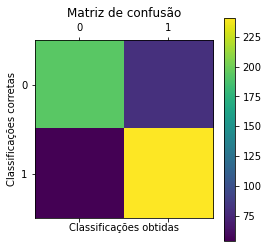

In [97]:
plt.matshow(confusion_matrix)
plt.title("Matriz de confusão")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações obtidas")
plt.show()

#### A Matriz de confusão pode ser lida tanto na horizontal quanto na vertical.
#### Leitura na Horizontal
##### Existem 273 itens classificados na classe 0 (No):
* 193 desses itens estão corretamente classificados na classe No.
* 80 desses itens estão incorretamente classificados na classe Yes.

##### Há 295 itens na classe 1 (Yes):
* 54 desses itens estão incorretamente classificados na classe No.
* 241 desses itens estão corretamente classificados na classe Yes.

#### Leitura na Vertical
##### Existem 247 itens classificados na classe 0 (No):
* 193 desses itens estão corretamente classificados na classe No.
* 54 desses itens estão incorretamente classificados na classe Yes.

##### Há 321 itens na classe 1 (Yes):
* 80 desses itens estão incorretamente classificados na classe No.
* 241 desses itens estão corretamente classificados na classe Yes.

***

##### **Prevendo estresse utilizando novos dados**

In [123]:
new_posts = [
    "What a hell of a job, every day I have to see that woman's melancholy face. I can't take this horrible feeling anymore that feels like I'm being sucked into some black hole.",
    "How I love arriving in the morning and smelling Rose's coffee. This company has a wonderful environment, I feel happy and fulfilled in this place."
]

new_posts_vectorize = vectorizer.transform(new_posts)

predicted = model3.predict(new_posts_vectorize)

for doc, category in zip(new_posts, predicted):
    category_name = lambda category : 'Yes' if(category == 1) else 'No'
    print('%r => %s' % (doc, category_name(category)))

"What a hell of a job, every day I have to see that woman's melancholy face. I can't take this horrible feeling anymore that feels like I'm being sucked into some black hole." => Yes
"How I love arriving in the morning and smelling Rose's coffee. This company has a wonderful environment, I feel happy and fulfilled in this place." => No


***